In [11]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from implementations import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [ ]:
#unzip csv 
import zipfile
with zipfile.ZipFile('../data/test.csv.zip') as zip_ref:
    zip_ref.extractall(r"../data")

In [2]:
from proj1_helpers import *

DATA_TRAIN_PATH = '../data/train.csv' #download train data and supply path here 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)

print(y.shape, tx.shape, ids.shape)

(250000,) (250000, 30) (250000,)


## Do your thing crazy machine learning thing here 

### Exploratory Data Analysis

In [46]:
df = pd.read_csv(DATA_TRAIN_PATH)
tx_train = df.drop(['Id','Prediction'],axis=1)
y_train = df.iloc[:,1:2]

In [47]:
tx_train.head(3) 

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251


In [48]:
y_train.head(3)

,Prediction
0,s
1,b
2,b


#### Correlation matrix

In [49]:
corr_matrix = tx_train.corr()

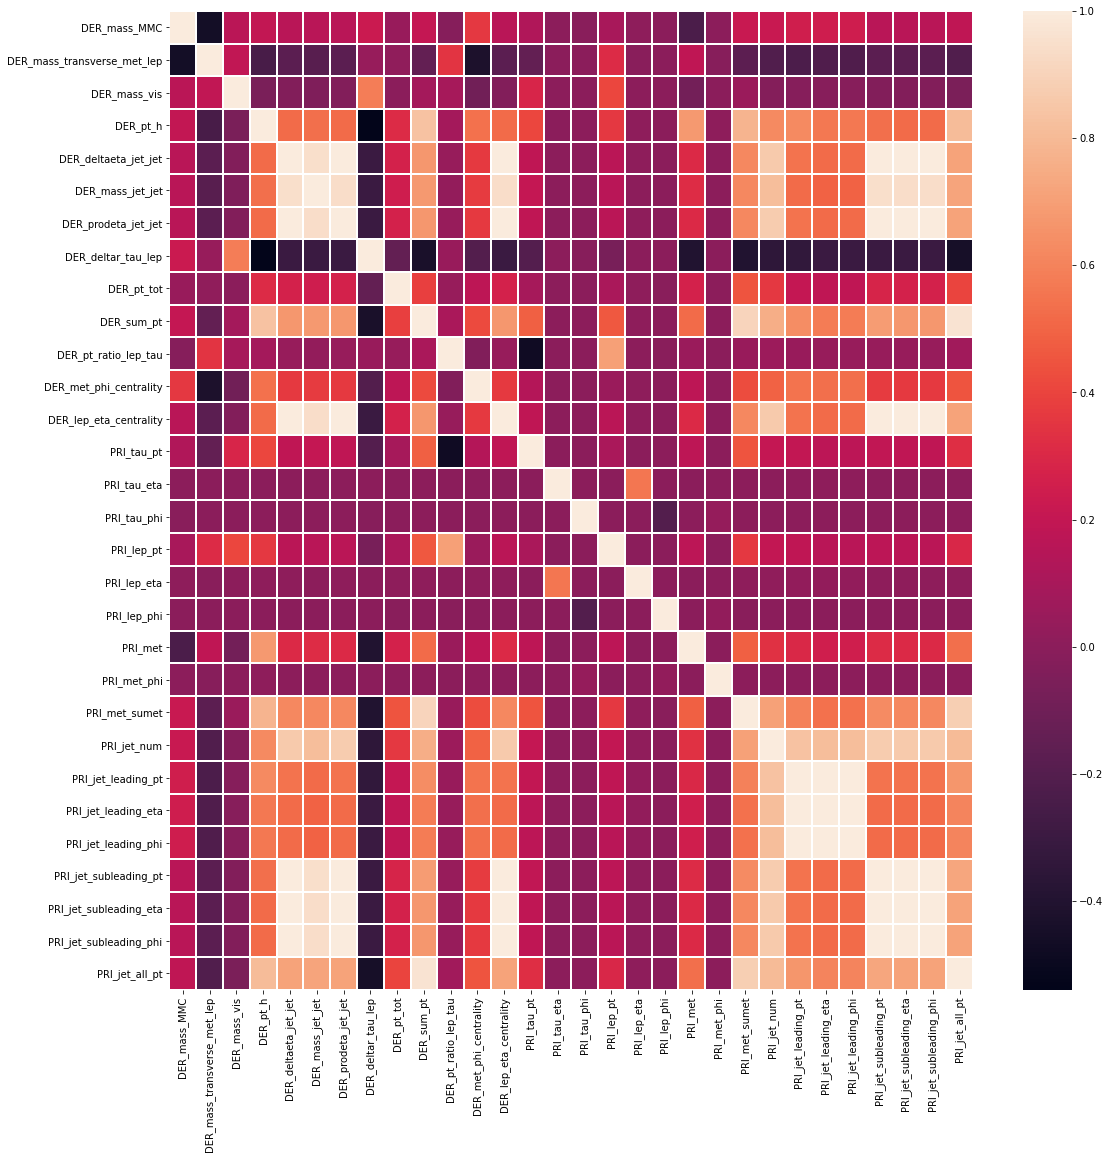

In [55]:
plt.figure(figsize = (18,18))
ax = sns.heatmap(corr_matrix,linewidths=1, linecolor='white')

### Feature  processing

In [56]:
#I read that by removing the features that have high corr we can improve the model, i tink we shuld check that

### 

### Finding the model

In [8]:
gamma = 0.01
max_iters = 5
initial_w = np.zeros(30)

regression_res = [least_squares_GD(y, tx, initial_w, max_iters,gamma),
                  least_squares_SGD(y, tx, initial_w, max_iters, gamma),
                  least_squares(y, tx)]
regression_names = ["Gradient Descent","Stochastic Gradient Descent", "Least Squares"]
for i in range (len(regression_res)):
    w,loss = regression_res[i]
    print("{name}, w*={w}, loss={l}\n".format(name=regression_names[i],w=w, l=loss))

Gradient Descent, w*=[-5.84476685e+13  2.94012156e+13  4.43060537e+13  1.70529814e+13
 -5.50390749e+14 -5.59188166e+14 -5.50307353e+14  1.37771068e+12
  7.89863980e+12  5.39430271e+13  7.61821391e+11 -2.70963323e+11
 -5.50355105e+14  1.91397621e+13 -8.78080559e+09 -6.84220506e+09
  2.36575048e+13 -1.64409730e+10  2.34930018e+10  1.84789340e+13
 -9.61359354e+09  8.14370110e+13  1.83469826e+11 -3.29129527e+14
 -3.41247337e+14 -3.41250309e+14 -5.51114562e+14 -5.50347613e+14
 -5.50347721e+14  1.11457600e+13], loss=7.1384765944975e+36

Stochastic Gradient Descent, w*=[-1.79516203e+13 -3.01035116e+12 -9.47841150e+12 -3.42301922e+13
 -6.12843901e+11 -7.20479767e+13  5.05146234e+11 -2.40089490e+11
 -1.10805910e+12 -5.46876148e+13 -1.38493041e+11 -3.22264083e+11
 -5.89327077e+10 -1.17019016e+13  2.05851187e+11  5.98836507e+11
 -7.01060232e+12  3.87575855e+11 -6.96387191e+11 -1.66169480e+13
  6.90920866e+11 -6.70419063e+13 -4.62170374e+11 -2.36011983e+13
  5.39809012e+11  6.35424415e+10 -1.22329

## Generate predictions and save ouput in csv format for submission:

In [ ]:
# signal  (a  Higgs  boson) --> 1 
# background --> -1 

In [10]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
#first comment